In [1]:
# from methods import OA_SA, VA_SA
import numpy as np
from envs import DynamicQVRPEnv
from methods import Agent, GreedyAgent, MSAAgent, OfflineAgent
from experiments import run_agent
import matplotlib.pyplot as plt
import pickle
from utils.plot_results import plot

/Users/faridounet/Research/PhD/DynamicQVRP/utils/plot_results.py:50: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean rewards $\pm 2\sigma$'


In [2]:
# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1],
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [3]:

# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDyn_100"
file = "res_TSP_fullDyn_100_equiProb"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL_DQN.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
with open(f'results/{file}/res_RL_DQN_equiProb.pkl', "rb") as f:
    res_RL_equiProb = pickle.load(f)
    
# with open(f'results/{file}/res_RL_PPO.pkl', "rb") as f:
#     res_RL_PPO = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    

data = {
    "Offline" : res_offline,  
    "MSA" : res_MSA, 
    "Greedy" : res_greedy, 
    "SL" : res_SL, 
    "DQN" : res_RL, 
    "DQN uniforme" : res_RL_equiProb, 
    # "RL (PPO)" : res_RL_PPO, 
    "Random" : res_random, 
}
    
    

In [4]:
env_configs

{'K': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 30,
 're_optimization': False,
 'costs_KM': [1],
 'emissions_KM': [0.3],
 'n_scenarios': 100,
 'test': True,
 'unknown_p': True}

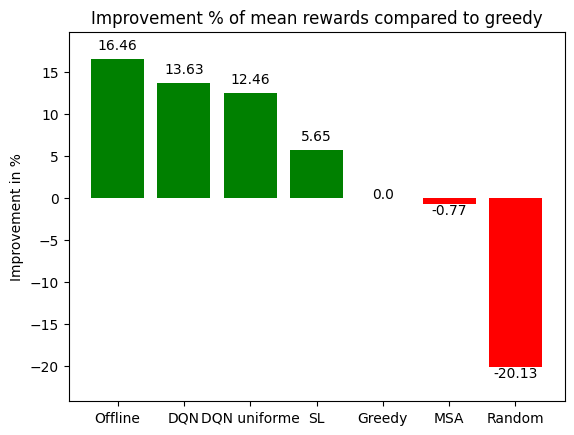

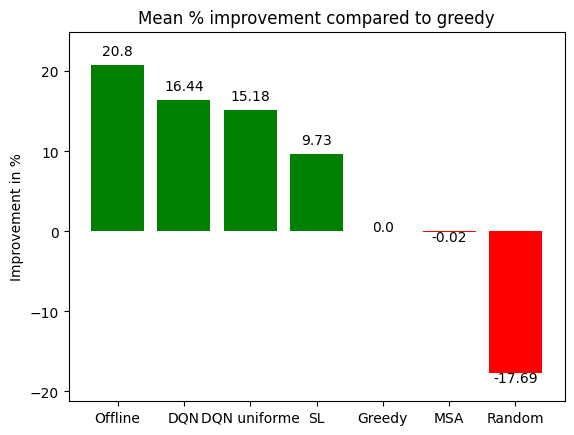

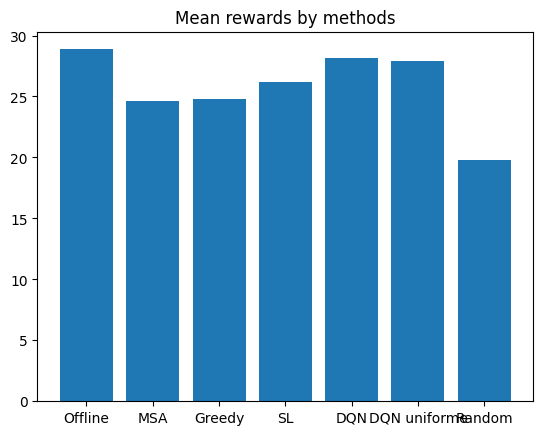

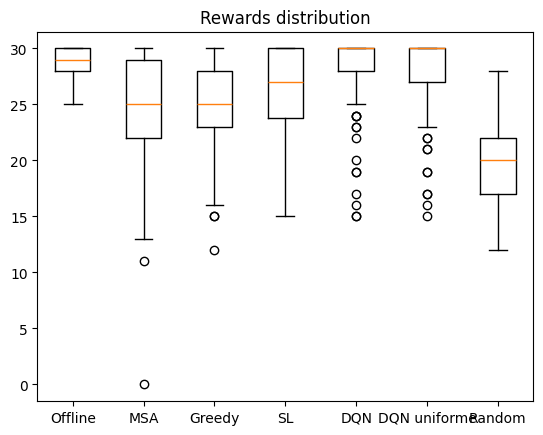

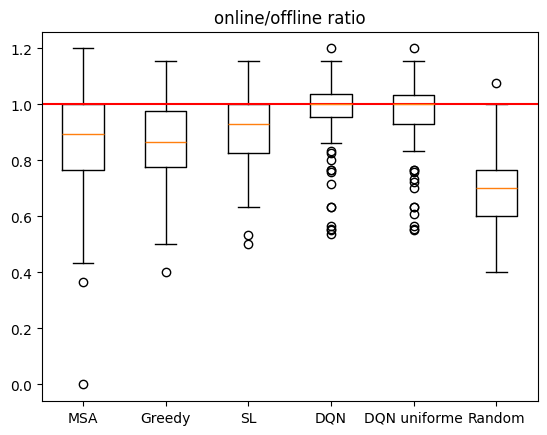

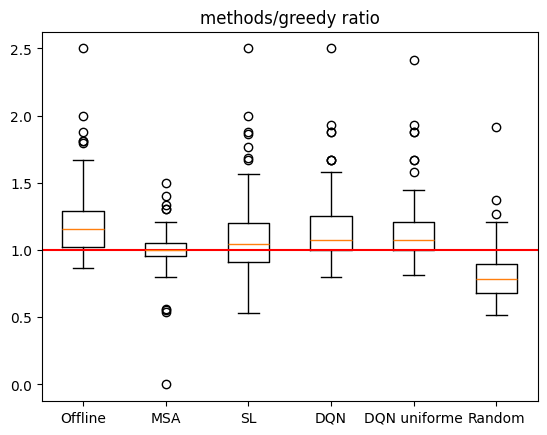

/Users/faridounet/Research/PhD/DynamicQVRP/utils/plot_results.py:99: RuntimeWarning: divide by zero encountered in divide
  k : data[k]["rs"]/data["MSA"]["rs"]


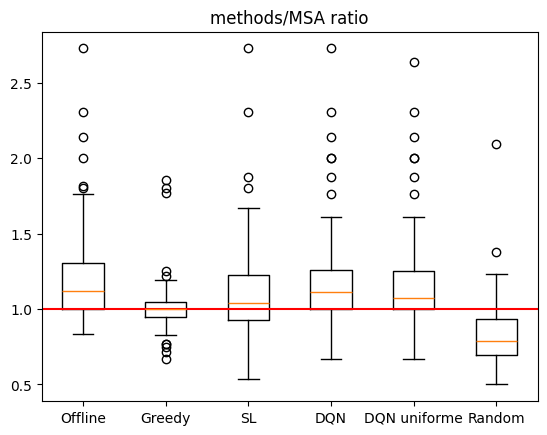

In [5]:
plot(data)

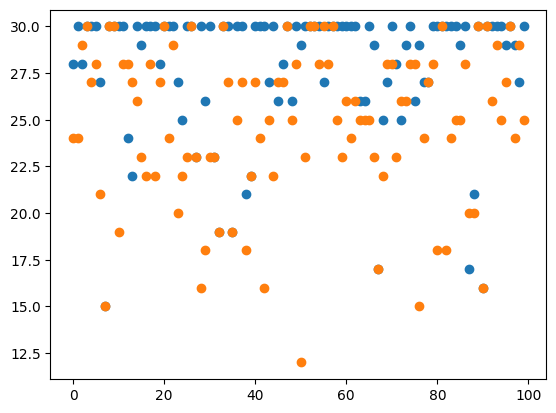

In [6]:
plt.scatter(np.arange(len(res_greedy["rs"])), res_RL_equiProb["rs"])
plt.scatter(np.arange(len(res_greedy["rs"])), res_greedy["rs"])

In [7]:
assert False

AssertionError: 

Different DoDs

In [ ]:
# GreedySL = []
# GreedyRL = []
# x = [1., .95, .9, .85, .8, .75]

# for dod in x:
#     with open(f'results/DoD{dod}/res_SL.pkl', "rb") as f: res_SL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_RL.pkl', "rb") as f: res_RL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_greedy.pkl', "rb") as f: res_greedy = pickle.load(f)
    
#     GreedySL.append(100*(res_SL["rs"].mean()/res_greedy["rs"].mean() -1))
#     GreedyRL.append(100*(res_RL["rs"].mean()/res_greedy["rs"].mean() -1))
    
# print(GreedySL)
# print(GreedyRL)

In [ ]:
# # plt.plot(x, GreedySL)
# plt.plot(x, GreedyRL)
# # plt.axis([max(x), min(x), min(GreedySL), max(GreedySL)])

In [ ]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import pandas as pd

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    rolled = pd.Series(values).rolling(window)
    std = np.array(rolled.std())#/np.sqrt(window)
    mean = np.array(rolled.mean())
    # weights = np.repeat(1.0, window) / window
    return mean, std#np.convolve(values, weights, "valid"), std


def plot_results(log_folder, 
                 title="Learning Curve", 
                 label = None,
                 window = 75,
                 ylim = None,
                 n = 0,
                 ):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    if n:
        ys = []
        for i in range(n):
            x, y = ts2xy(load_results(log_folder[:-1]+str(i)), "timesteps")
            ys.append(y[:10_000])
            print(len(y))
        y = np.mean(ys, axis=0)
    else:
        x, y = ts2xy(load_results(log_folder), "timesteps")
    y, std = moving_average(y, window=window)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    if label is None:
        label = 'mean rewards $\pm 2\sigma$'
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - 2*std, y + 2*std, alpha=0.2)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title + " Smoothed")
    # plt.legend()
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return x
    # plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_14640/2819397349.py:48: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean rewards $\pm 2\sigma$'


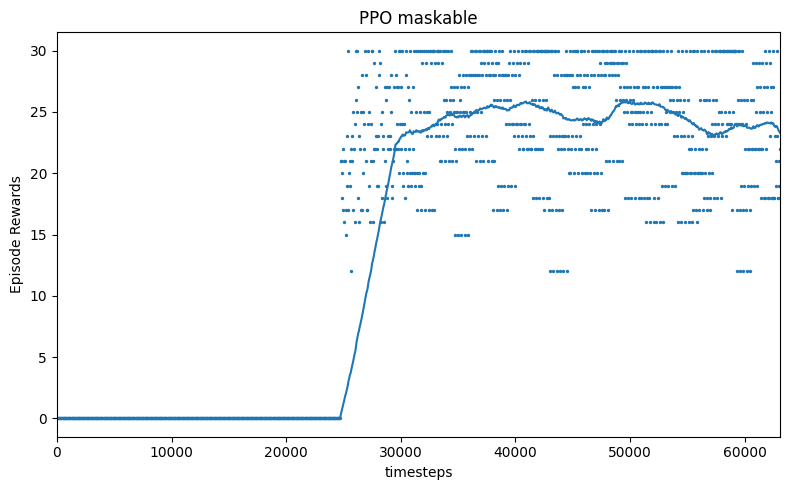

In [ ]:
log_dirPPO = f'methods/ML/models/PPO/'
log_dirDQN = f'methods/ML/models/DQN/'

# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
results_plotter.plot_results(
    [log_dirPPO], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
)

In [13]:
x = plot_results(log_dirDQN, window=500, label='mean RL (DQN)')
_ = plot_results(log_dirPPO, window=500, label='mean RL (PPO)')
plt.hlines(res_greedy["rs"].mean(), 0, x[-1], linestyles = '-.', label=f'mean Greedy', colors='red')
plt.title(f'RL (PPO)\n Learning curve')

plt.legend(loc='lower right')
plt.show()
# plt.ylim(0,1)
# plt.fill_between(x, rs_DP.min(), rs_DP.max(), alpha=0.2)
# _ = plot_results(log_dir2)

NameError: name 'plot_results' is not defined